In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getDataQ(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('eta_quark')
    scalar.append('p_quark')
    scalar.append('theta_quark')
    
    scalar.append('eta_electron')
    scalar.append('p_electron')
    scalar.append('pt_electron')
    scalar.append('theta_electron')  
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
def getDataJ(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid') 
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    
    scalar.append('eta_jet')
    scalar.append('p_jet')
    scalar.append('theta_jet')
    scalar.append('phi_jet')
    
    scalar.append('eta_electron')
    scalar.append('p_electron')
    scalar.append('pt_electron')
    scalar.append('theta_electron')  
    scalar.append('phi_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def getDataPart(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('pt_electron')
    scalar.append('phi_photon')
    
    cols.append('p_part')
    cols.append('eta_part')
    cols.append('theta_part')
    cols.append('phi_part')
    
    scalar.append('p_electron')
    scalar.append('eta_electron')
    scalar.append('theta_electron')
    
    lists = scalar + cols
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
file1 = ["$HOME/EIC/output/507.root"] # number of charged particles, netural hadrons and decay photons with R = 0.3

In [6]:
aq = getDataQ(file1)


Processed $HOME/EIC/output/507.root in 95.5 seconds


In [7]:
aj = getDataJ(file1)


Processed $HOME/EIC/output/507.root in 171.4 seconds


In [17]:
ap = getDataPart(file1)

ValueError: Pattern 'p_part' didn't match any branch

In [8]:
radii = [0, 10, 20, 30, 40]
r_labels = ['$0$','$10$','$20$','$30$','$40$']
radii_s = [0, 5, 10, 15, 20]
r_labels_s = ['$0$','$5$','$10$','$15$','$20$']
angles = [90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          220.395062579, 270, 319.604937421, 344.585373193, 354.299529125, 357.90141703, 360]
eta_labels=['$0$','$-1$','$-2$','$-3$','$-4$','$-\infty$','$-4$','$-3$','$-2$','$-1$','$0$','$1$','$2$','$3$','$4$','$\infty$']
nr = 40
nr_s = 20
ntheta = 90

In [9]:
q = applyCut(aq, '10 < pt_electron < 30', '10 < pt_electron < 30')
q = applyCut(q, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
q = applyCut(q, 'Q2 > 100', 'Q2 > 100')
q.eval('theta_quark_neg = 6.28318530718 - theta_quark', inplace = True)
q = keepOneJet(q)

10 < pt_electron < 30 189040  fraction kept: 0.3
0.1 < y < 0.85 141989  fraction kept: 75.1
Q2 > 100 141989  fraction kept: 100.0

Remove extra jets 15610  fraction kept: 11.0


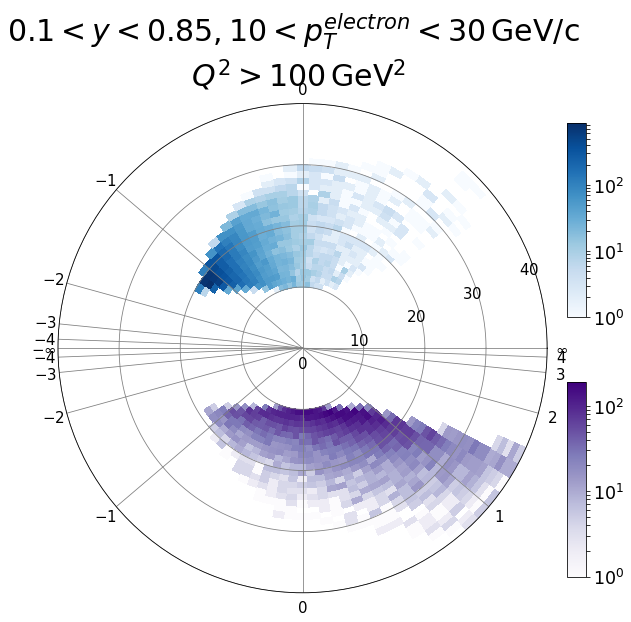

In [10]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(q['p_electron'], q['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(q['p_quark'], q['theta_quark_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Purples', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 10 < p_T^{electron} < 30 \, \mathrm{GeV/c}$ \n $Q^2 > 100 \, \mathrm{GeV^2}$', fontsize=30, y=1.03)
plt.savefig('images/polar_quark_1_r03.pdf', bbox_inches='tight')

In [11]:
jj = applyCut(aj, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
jj = applyCut(jj, '10 < pt_electron < 30', '10 < pt_electron < 30')
jj = applyCut(jj, 'Q2 > 100', 'Q2 > 100')
jj_e = keepOneJet(jj)
jj.eval('theta_jet_neg = 6.28318530718 - theta_jet', inplace = True)
jj = fixPhi(jj, 'photon')
jj = applyCut(jj, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

0.1 < y < 0.85 11874449  fraction kept: 17.2
10 < pt_electron < 30 141989  fraction kept: 1.2
Q2 > 100 141989  fraction kept: 100.0

Remove extra jets 15610  fraction kept: 11.0
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 53451  fraction kept: 37.6


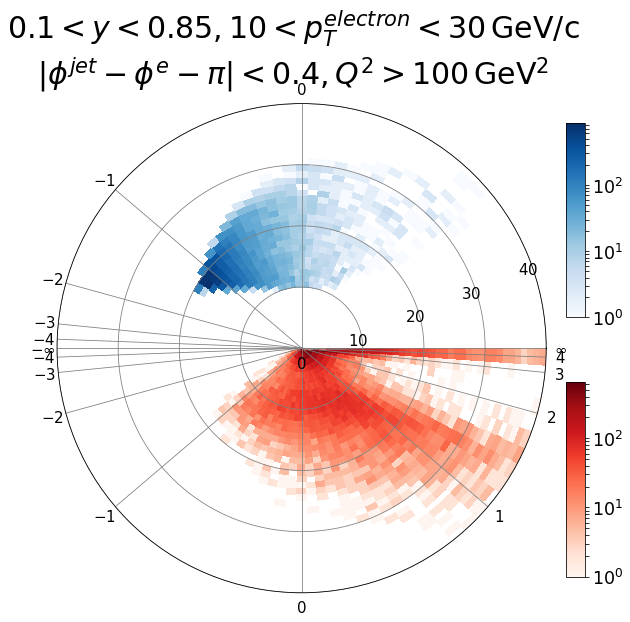

In [12]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(jj_e['p_electron'], jj_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(jj['p_jet'], jj['theta_jet_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Reds', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 10 < p_T^{electron} < 30 \, \mathrm{GeV/c}$\n\
$|\phi^{jet} - \phi^e - \pi|<0.4, Q^2 > 100 \, \mathrm{GeV^2}$', fontsize=30, y=1.03)
plt.savefig('images/polar_jet_1_r03.pdf', bbox_inches='tight')

In [13]:
qq = applyCut(aq, '0.008 < x < 0.01', '0.008 < x < 0.01')
qq = applyCut(qq, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
qq = applyCut(qq, '25 < Q2 < 55', '25 < Q2 < 55')
qq.eval('theta_quark_neg = 6.28318530718 - theta_quark', inplace = True)
qq = keepOneJet(qq)

0.008 < x < 0.01 2443639  fraction kept: 5.0
0.1 < y < 0.85 435010  fraction kept: 17.8
25 < Q2 < 55 72908  fraction kept: 16.8

Remove extra jets 9383  fraction kept: 12.9


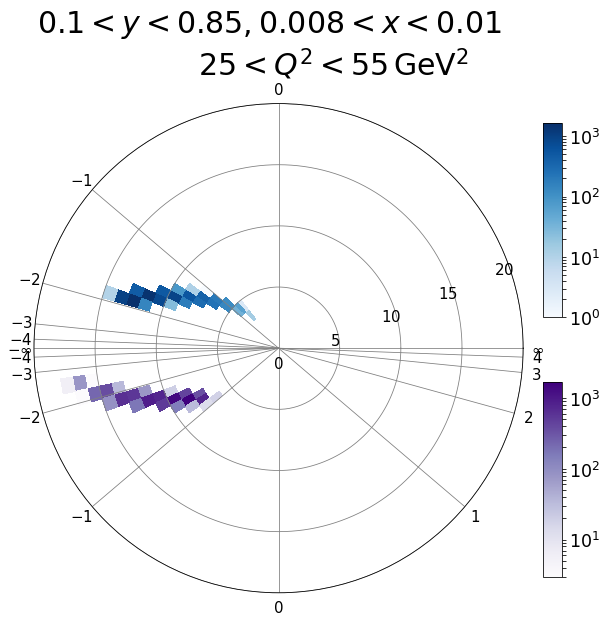

In [14]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True, aspect='equal')
r_edges = np.linspace(0, nr_s, nr_s + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(qq['p_electron'], qq['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(qq['p_quark'], qq['theta_quark_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Purples', norm=LogNorm())
plt.rgrids(radii_s, labels=r_labels_s, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 0.008 < x < 0.01$ \n $ \qquad \qquad 25 < Q^2 < 55 \, \mathrm{GeV^2}\,\qquad\qquad\qquad$', fontsize=30, y=1.03)
plt.savefig('images/polar_quark_2_r07.pdf', bbox_inches='tight')

In [15]:
jjj = applyCut(aj, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
jjj = applyCut(jjj, '0.008 < x < 0.01', '0.008 < x < 0.01')
jjj = applyCut(jjj, '25 < Q2 < 55', '25 < Q2 < 55')
jjj_e = keepOneJet(jjj)
jjj.eval('theta_jet_neg = 6.28318530718 - theta_jet', inplace = True)
jjj = fixPhi(jjj, 'photon')
jjj = applyCut(jjj, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
jjj = applyCut(jjj, 'p_jet > 5', 'p_jet > 5')

0.1 < y < 0.85 8732305  fraction kept: 18.0
0.008 < x < 0.01 435010  fraction kept: 5.0
25 < Q2 < 55 72908  fraction kept: 16.8

Remove extra jets 9383  fraction kept: 12.9
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 18159  fraction kept: 24.9
p_jet > 5 7146  fraction kept: 39.4


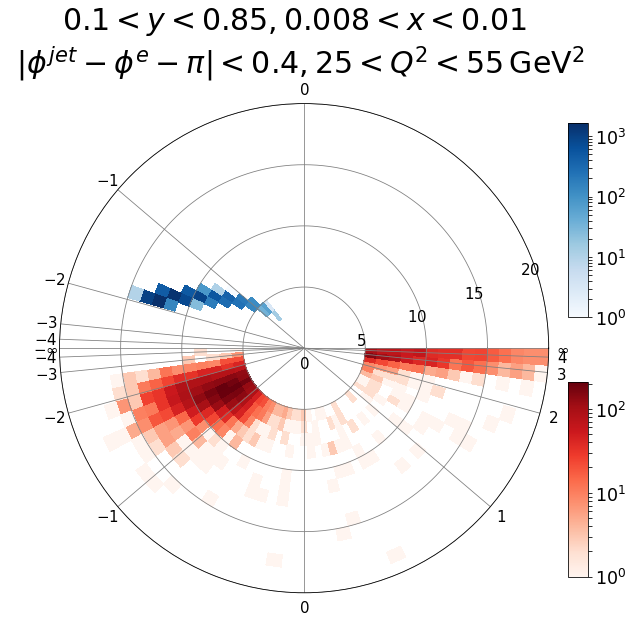

In [16]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True, aspect='equal')
r_edges = np.linspace(0, nr_s, nr_s + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(jjj_e['p_electron'], jjj_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(jjj['p_jet'], jjj['theta_jet_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Reds', norm=LogNorm())
plt.rgrids(radii_s, labels=r_labels_s, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 0.008 < x < 0.01$ \n $|\phi^{jet} - \phi^e - \pi|<0.4, 25 < Q^2 < 55 \, \mathrm{GeV^2}$', \
             fontsize=30,y=1.03)
plt.savefig('images/polar_jet_2_r07.pdf', bbox_inches='tight')